<a href="https://colab.research.google.com/github/MatheusLPM/salesPrediction/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise vendas de jogos por região usando algoritmos de reconhecimentos de padrões

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

In [ ]:
games = pd.read_csv("/content/drive/MyDrive/PLP1 - Matheus Lourenço/vgsales.csv")

In [ ]:
games.head(10) #mostra os 10 primeiros Ranks da minha lista

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
games.info() # informa a quantidade de variaveis não nulas e o tipo da variavel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
games.isnull().sum()  #valores que recebem N/A em cada coluna

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# Recurso 'Year' está ausente foram excluídas do DataFrame.

games = games[np.isfinite(games['Year'])]
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


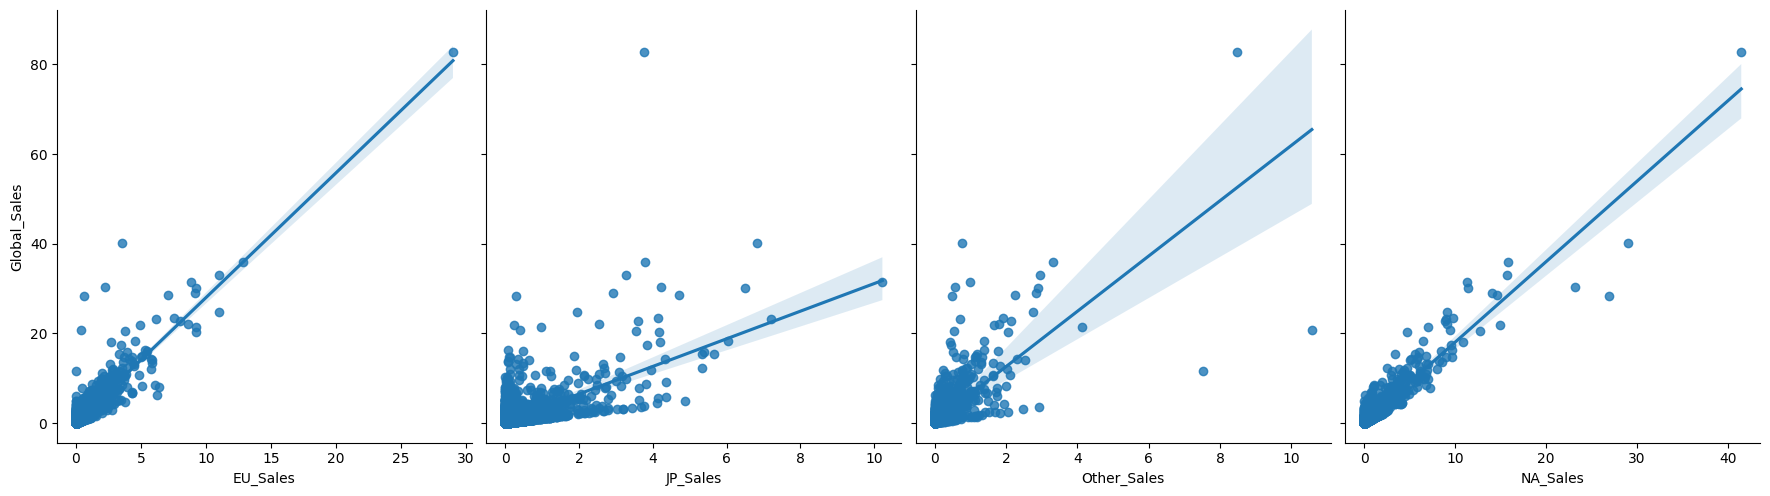

In [ ]:
#relações de emparelhados entre variáveis dentro de um conjunto de dados. Isso cria uma boa visualização e nos ajuda a entender os dados ao resumir uma grande quantidade de dados

import matplotlib.pyplot as plt

sns.pairplot(games, kind="reg",

             x_vars=["EU_Sales","JP_Sales","Other_Sales","NA_Sales"],
             y_vars=["Global_Sales"],
             height=4,size=5,aspect=0.9)

<ipython-input-9-3732661dad72>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = games.corr()


<Axes: >

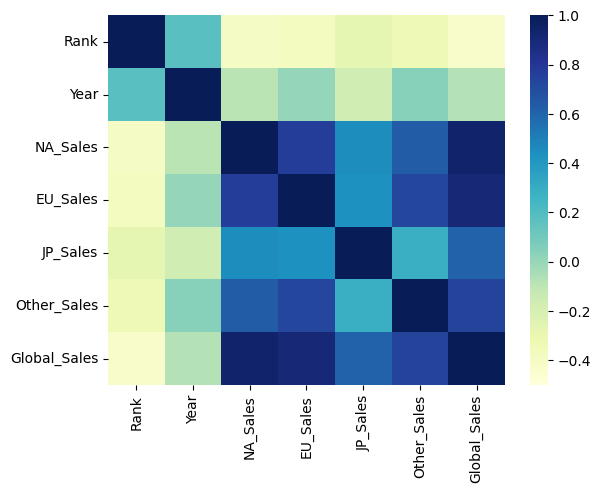

In [ ]:
#corr_matrix = games.corr()
#print(corr_matrix)

cor = games.corr()
cor = pd.DataFrame(cor)
sns.heatmap(cor, vmin=-0.5, cmap="YlGnBu")

In [ ]:
x = games.drop(['Name', 'Global_Sales', 'NA_Sales'], axis = 1) #variavel de teste
y = games['NA_Sales'] #Variavel de treino

#mostrando as colunas

display(x[:5])
display(y[:5])

,Rank,Platform,Year,Genre,Publisher,EU_Sales,JP_Sales,Other_Sales
0,1,Wii,2006.0,Sports,Nintendo,29.02,3.77,8.46
1,2,NES,1985.0,Platform,Nintendo,3.58,6.81,0.77
2,3,Wii,2008.0,Racing,Nintendo,12.88,3.79,3.31
3,4,Wii,2009.0,Sports,Nintendo,11.01,3.28,2.96
4,5,GB,1996.0,Role-Playing,Nintendo,8.89,10.22,1.00


0    41.49
1    29.08
2    15.85
3    15.75
4    11.27
Name: NA_Sales, dtype: float64

In [ ]:
from sklearn.decomposition import PCA


# Realiza uma análise de componentes principais nesses três recursos para obter um recurso oculto subjacente.
# Dividindo o conjunto de dados de recursos em dois.

CaracterVendas = x.drop(['Rank', 'Platform', 'Year', 'Genre', 'Publisher'], axis = 1)

CaracterOutras = x.drop(['EU_Sales', 'JP_Sales', 'Other_Sales', 'Rank'], axis = 1)

# Estou obtendo os recursos transformados do PCA
# reduz a dimensão de um conjunto de dados preservando, de certa forma, suas propriedades

pca = PCA(n_components = 1)
pca.fit(CaracterVendas) #Ajusta o modelo aos dados que estamos passando

nova_caractersticas_vendas = pca.transform(CaracterVendas)

# Por fim, estou mesclando os novos recursos de vendas transformados.
# Coluna de volta junto com as colunas CaracterOutras...

novaVendas = pd.DataFrame(data = nova_caractersticas_vendas,index = CaracterVendas.index,columns = ['Sales'])

CaracterRecons = pd.concat([CaracterOutras, novaVendas],axis = 1)

display(CaracterRecons[:5])

,Platform,Year,Genre,Publisher,Sales
0,Wii,2006.0,Sports,Nintendo,29.632910
1,NES,1985.0,Platform,Nintendo,5.501985
2,Wii,2008.0,Racing,Nintendo,13.630893
3,Wii,2009.0,Sports,Nintendo,11.673835
4,GB,1996.0,Role-Playing,Nintendo,11.500658


In [ ]:
# Transformação das variaveis categóricas

temp = pd.DataFrame(index = CaracterRecons.index)

for col, col_data in CaracterRecons.iteritems():

    if col_data.dtype == object:
        col_data = pd.get_dummies(col_data, prefix = col)

    temp = temp.join(col_data)

CaracterRecons = temp
display(CaracterRecons[:10])

<ipython-input-12-9b5025079233>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, col_data in CaracterRecons.iteritems():


,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,...,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN,Sales
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29.632910
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.501985
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13.630893
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.673835
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.500658
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.408366
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.089747
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.885716
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.364226
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.613576


In [ ]:
#Dividindo teste e treinamento
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CaracterRecons,y,test_size = 0.2,random_state = 2)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

r = Ridge()
r = r.fit(X_train,y_train)

y_predr = r.predict(X_test)


print("Precisão do treino:", r.score(X_train, y_train))
print("Pontuação do teste:", r.score(X_test, y_test))

Precisão do treino: 0.5839728730776095
Pontuação do teste: 0.7679852770372051


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

regDTR = DecisionTreeRegressor()
regDTR.fit(X_train, y_train)

y_regDTR = regDTR.predict(X_test)


print("Precisão do treino:", regDTR.score(X_train, y_train))
print("Pontuação do teste:", regDTR.score(X_test, y_test))

Precisão do treino: 0.9999072526536364
Pontuação do teste: 0.6586606335340328


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

regKNR = KNeighborsRegressor()
regKNR.fit(X_train, y_train)

y_regKNR = regKNR.predict(X_test)

print("Precisão do treino:", regKNR.score(X_train, y_train))
print("Pontuação do teste:", regKNR.score(X_test, y_test))

Precisão do treino: 0.7027053401651819
Pontuação do teste: 0.5366794156762358
